In [26]:
from os import path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
pred_dir = './prediction'
get_path = lambda name: path.join(pred_dir, name)

sota = pd.read_csv(get_path('sota_ref.csv'))
to_compare = [
    pd.read_csv(get_path('koelectra-base-v3-discriminator_10epochs.csv')),
    pd.read_csv(get_path('plain_submission.csv'))
]

froms = []
for n, labels in enumerate(to_compare):
    froms += [f'comp_{n}'] * len(labels)

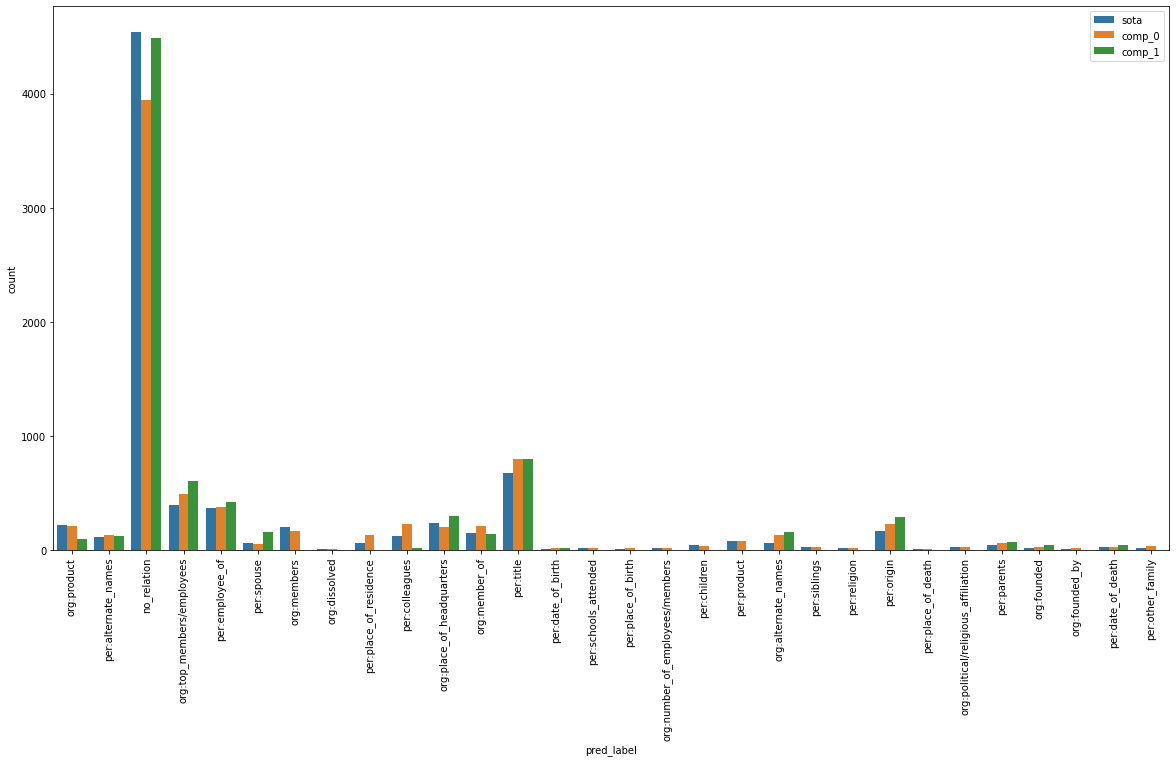

In [28]:
concated = pd.concat(to_compare, ignore_index=True)

df = pd.DataFrame({
    'pred_label': pd.concat([sota['pred_label']] + list(map(lambda x: x['pred_label'], to_compare)), ignore_index=True),
    'from': ['sota'] * len(sota['pred_label']) + froms
})

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot = sns.countplot(x='pred_label', data=df, hue='from', ax=ax)
plt.xticks(rotation=90)
plt.legend(loc='upper right')